In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,1,Chardonnay,7.4,0.00,1.9,0.076,34.0,73.626253,0.56,9.4,Port,Balanced,39
1,2,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,57.670971,0.68,9.8,White,Sour,55
2,3,Merlot,7.8,NaN,2.3,0.092,54.0,64.852135,NaN,9.8,Rose,Earthy,89
3,4,Pinot Noir,11.2,0.56,1.9,0.075,60.0,82.262859,0.58,9.8,NaN,Bitter,32
4,5,Zinfandel,7.4,0.00,1.9,0.076,34.0,69.200715,0.56,9.4,Rose,Balanced,18


In [106]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [107]:
df=df.drop(['id','name'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,73.626253,0.56,9.4,Port,Balanced,39
1,7.8,0.00,2.6,0.098,67.0,57.670971,0.68,9.8,White,Sour,55
2,7.8,NaN,2.3,0.092,54.0,64.852135,NaN,9.8,Rose,Earthy,89
3,11.2,0.56,1.9,0.075,60.0,82.262859,0.58,9.8,NaN,Bitter,32
4,7.4,0.00,1.9,0.076,34.0,69.200715,0.56,9.4,Rose,Balanced,18


## Checking for any duplicate rows in the dataset and discarding them if any.

In [108]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


In [109]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [110]:
print(df.isnull().sum())

fixed acidity            2
citric acid              3
residual sugar           0
chlorides                1
total sulfur dioxide     5
density                 46
sulphates                2
alcohol                  0
type                     4
Taste                    5
quality                  0
dtype: int64


In [111]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


#### Renaming Target Column

In [112]:
df = df.rename(columns = {"quality" : "Target"})
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Target
0,7.4,0.0,1.9,0.076,34.0,73.626253,0.56,9.4,Port,Balanced,39
1,7.8,0.0,2.6,0.098,67.0,57.670971,0.68,9.8,White,Sour,55
4,7.4,0.0,1.9,0.076,34.0,69.200715,0.56,9.4,Rose,Balanced,18
5,7.4,0.0,1.8,0.075,40.0,69.200814,0.56,9.4,Red,Sour,29
7,7.3,0.0,1.2,0.065,21.0,36.512331,0.47,10.0,Rose,Balanced,51


## EDA

### Countplot

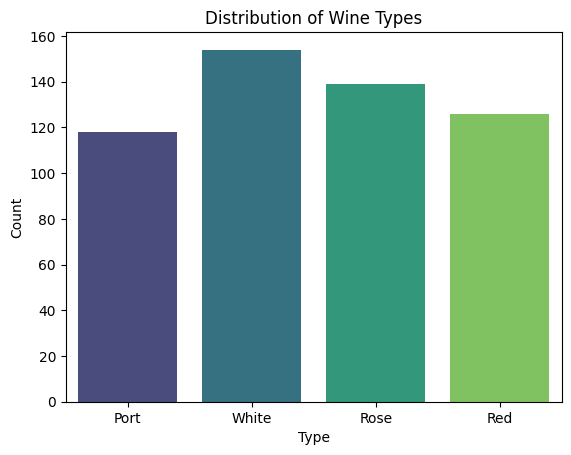

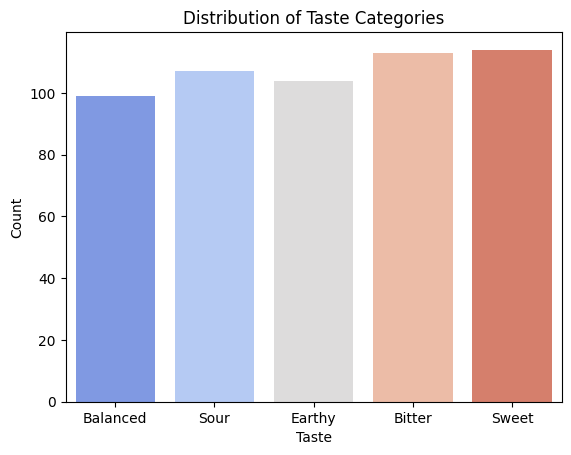

In [113]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap

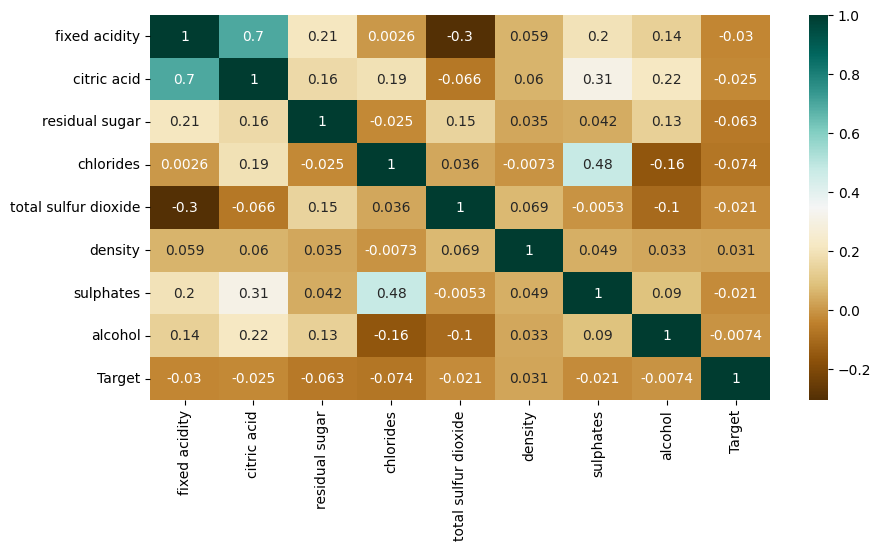

In [114]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Scatterplot

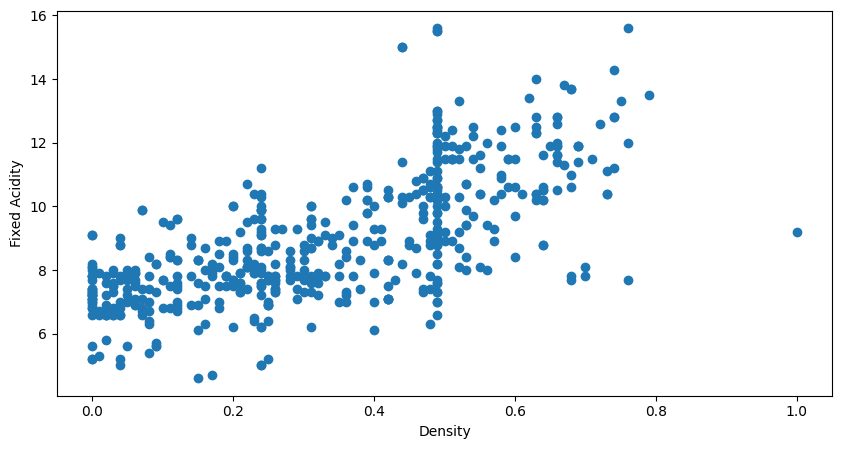

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['citric acid'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

### Pairplot

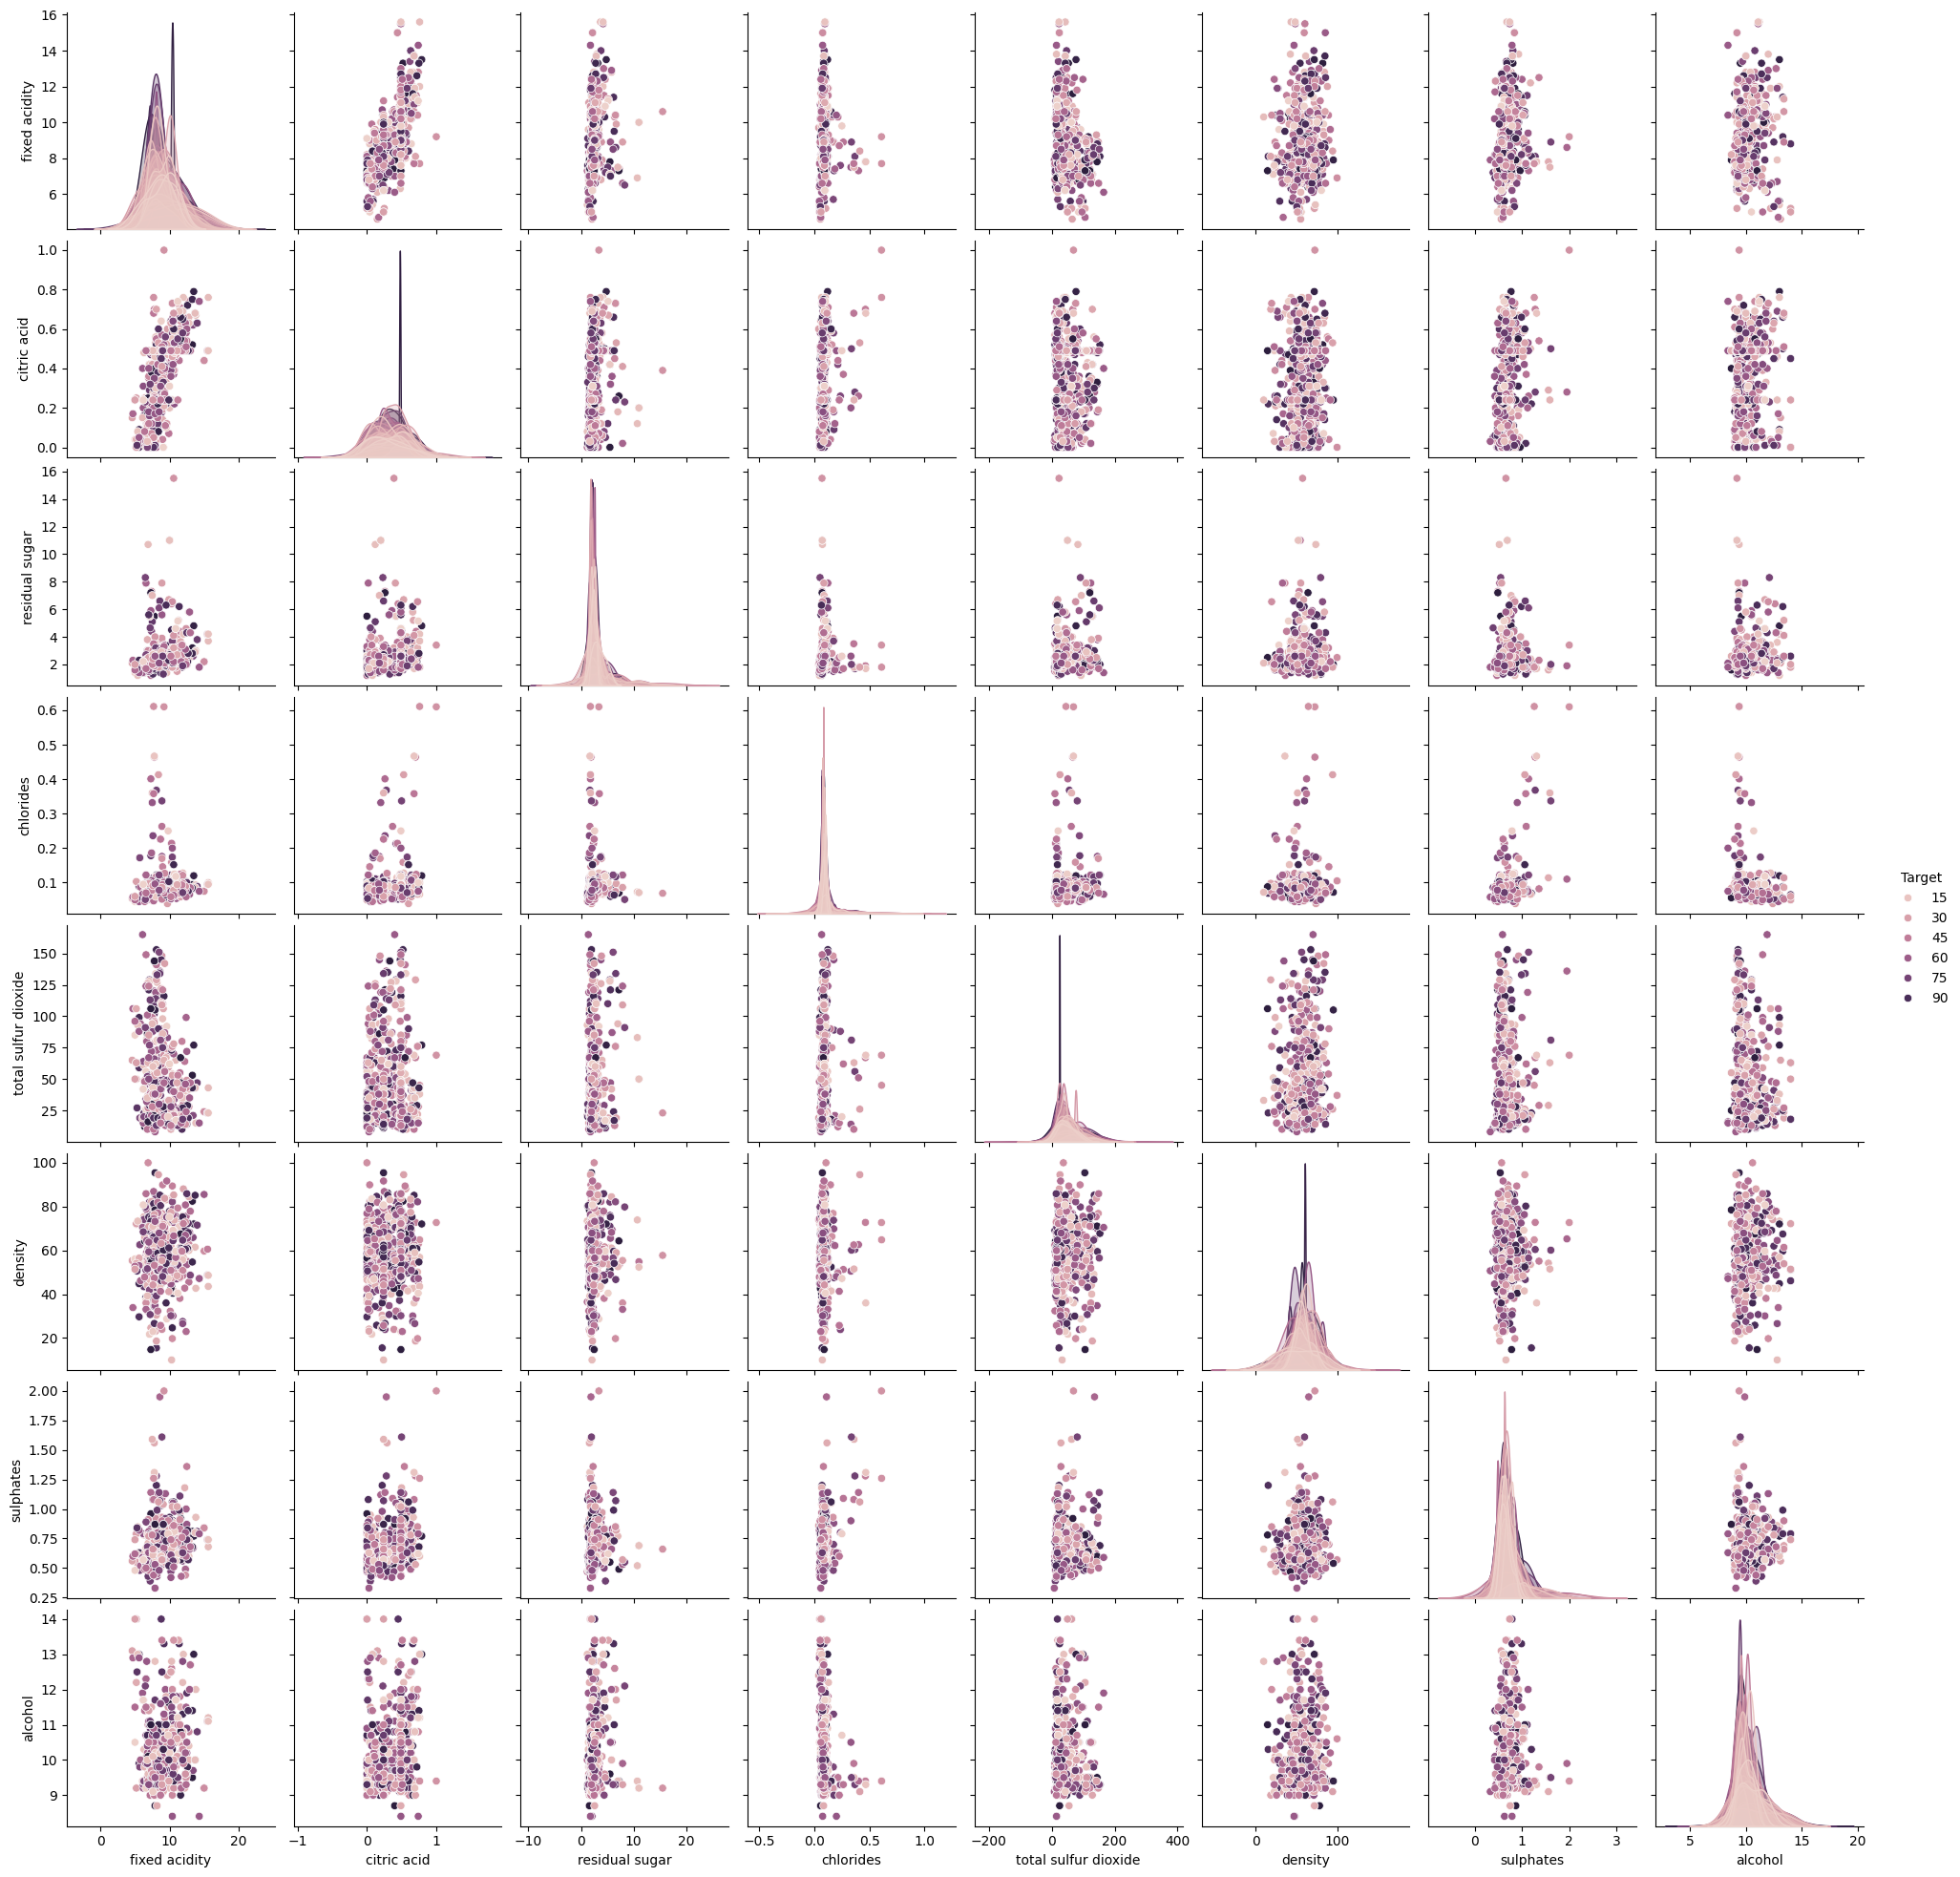

In [116]:
sns.pairplot(data=df,hue='Target')
plt.show()

In [117]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder as LE
le=LE()
df["Taste"]=le.fit_transform(df["Taste"])
df['type']=le.fit_transform(df["type"])
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Target
0,7.4,0.0,1.9,0.076,34.0,73.626253,0.56,9.4,0,0,39
1,7.8,0.0,2.6,0.098,67.0,57.670971,0.68,9.8,3,3,55
4,7.4,0.0,1.9,0.076,34.0,69.200715,0.56,9.4,2,0,18
5,7.4,0.0,1.8,0.075,40.0,69.200814,0.56,9.4,1,3,29
7,7.3,0.0,1.2,0.065,21.0,36.512331,0.47,10.0,2,0,51


## Spliting the dataset into Dependent and Independent Variables

In [124]:
x = df[['citric acid']]
y = df["fixed acidity"]

## Split the value to train and test

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=38)

## Fiting the Model to Training Set

In [126]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Predicting the Results

In [127]:
y_pred = reg.predict(X_test)

## Calculating The Accuracy

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

print("Model Score in Training data : ",reg.score(X_train, y_train))
print("Model Score in Testing data : ",reg.score(X_test, y_test))

# Retrieve the intercept and slope
intercept = reg.intercept_
slope = reg.coef_

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


# Print predicted and actual values
print("\nPredicted vs Actual values:")
for predicted, actual in zip(y_pred, y_test):
    print(f"Predicted: {predicted}, Actual: {actual}")

Model Score in Training data :  0.4677048596026051
Model Score in Testing data :  0.5499076743254405
Intercept: 6.8021641712416905
Slope: [6.54387991]

Predicted vs Actual values:
Predicted: 9.55059373274214, Actual: 7.1
Predicted: 8.765328143742012, Actual: 7.8
Predicted: 10.008665326325549, Actual: 13.0
Predicted: 10.008665326325549, Actual: 10.6
Predicted: 10.008665326325549, Actual: 10.9
Predicted: 10.008665326325549, Actual: 12.3
Predicted: 10.008665326325549, Actual: 11.5
Predicted: 8.176378951991916, Actual: 7.6
Predicted: 7.063919367575067, Actual: 7.0
Predicted: 6.998480568491723, Actual: 8.0
Predicted: 9.354277335492108, Actual: 10.2
Predicted: 10.466736919908959, Actual: 12.0
Predicted: 8.24181775107526, Actual: 8.1
Predicted: 8.634450545575325, Actual: 8.1
Predicted: 10.728492116242334, Actual: 10.6
Predicted: 8.24181775107526, Actual: 8.6
Predicted: 10.924808513492366, Actual: 10.4
Predicted: 7.1293581666584105, Actual: 7.2
Predicted: 6.933041769408379, Actual: 5.8
Predict

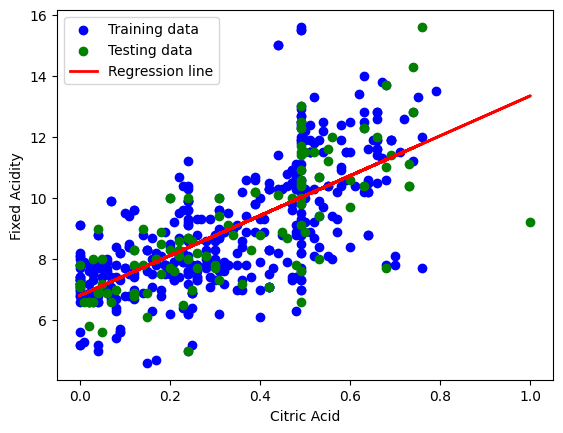

In [131]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the testing data
plt.scatter(X_test, y_test, color='green', label='Testing data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.show()

### Performing LR Analysis for target variable

In [138]:
x = df.drop("Target",axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=38)

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Model Score in Training data : ",reg.score(X_train, y_train))
print("Model Score in Testing data : ",reg.score(X_test, y_test))

# Retrieve the intercept and slope
intercept = reg.intercept_
slope = reg.coef_

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


# Print predicted and actual values
print("\nPredicted vs Actual values:")
count=0
for predicted, actual in zip(y_pred, y_test):
    if count==10:
        break
    print(f"Predicted: {predicted}, Actual: {actual}")
    count+=1

Model Score in Training data :  0.01893812817803875
Model Score in Testing data :  -0.028167427432905567
Intercept: 69.94377633199406
Slope: [-5.87726921e-01  4.54497262e+00 -8.98775409e-01 -4.83812615e+01
  4.02473459e-03  5.41963589e-02  6.90319656e-01 -7.65605305e-01
 -2.08420896e+00  6.09120616e-01]

Predicted vs Actual values:
Predicted: 9.55059373274214, Actual: 77
Predicted: 8.765328143742012, Actual: 94
Predicted: 10.008665326325549, Actual: 52
Predicted: 10.008665326325549, Actual: 56
Predicted: 10.008665326325549, Actual: 54
Predicted: 10.008665326325549, Actual: 87
Predicted: 10.008665326325549, Actual: 37
Predicted: 8.176378951991916, Actual: 33
Predicted: 7.063919367575067, Actual: 83
Predicted: 6.998480568491723, Actual: 26


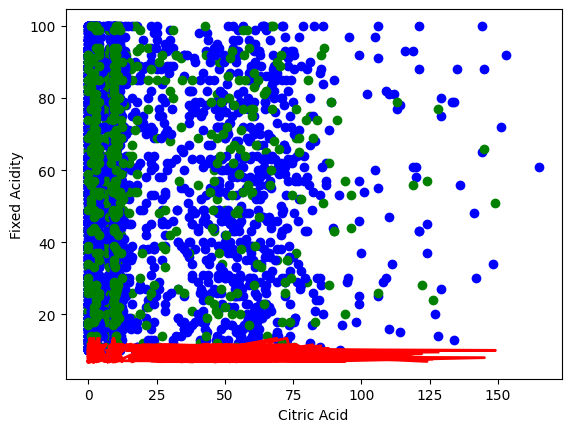

In [147]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train, color='blue', label='Training data')
    plt.scatter(X_test[i], y_test, color='green', label='Testing data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.show()